In [1]:
import random
import numpy as np
import pandas as pd
from __future__ import division
from sklearn import preprocessing
import matplotlib.pyplot as plt

%matplotlib inline  

In [203]:
def transfer(x,w):
    w_0 = w[0]
    w = w[1:]
    return -1 + 2*(-w_0 <= x.dot(w))

def SGD(x, y, eta): 
    # x must be a numpy.ndarray
    
    x_0 = 1
    w_0 = 1
    
    w_s = np.ones(len(x[0]))
    for i in range(100*len(x[0])):

        i = i % len(x[0])
        x_i = x[i]
        y_i = y[i]
        # V_x = w_s.dot(x_i) + w_0
        #import pdb; pdb.set_trace()

        V_x = transfer(x_i,np.insert(w_s,0,w_0)) # V(x) = g(g)
        
        w_0 = w_0 + eta * (y_i - V_x)
        w_s = w_s + ((eta * (y_i - V_x)) * x_i)
        
    return np.insert(w_s,0,w_0)  

def MSE(clasifier, testx, testy):
    return np.mean((testx.dot(clasifier[1:])- testy.values)**2)

In [218]:
def salida(w,X):
    return X.dot(w[1:]) + w[0]

def entrena(X,y,w,la=0.0,eta=0.01):
    for i in range(0, 4 * len(X)):
        i = i % len(X)
        #import pdb; pdb.set_trace()
        error = y[i] - transfer(X[i],w)
        w[0] = w[0] + eta*(error)
        w[1:] = w[1:] + eta*(error*X[i]) -la*w[1:]
    return w

# Caso AND

In [202]:
x = []
y = []

for i in range(0,100):
    x1 = np.random.randint(2)
    x2 = np.random.randint(2)
    x.append(np.array([x1,x2]))
    y += [x1 and x2]


In [220]:
coef = SGD(x,y,0.1)
coef= entrena(x,y,np.array([1,1,1]))
coef

array([0, 0, 0])

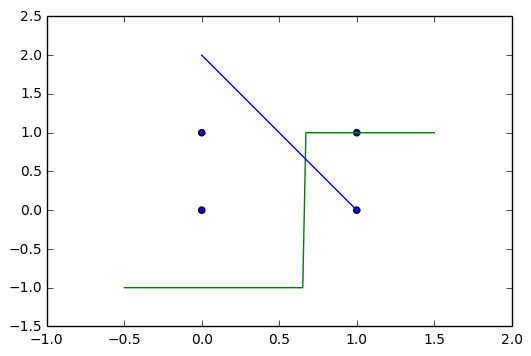

In [216]:
linx1 = np.linspace(-.5,1.5,100)
linx2 = np.linspace(-.5,1.5,100)
plot_Y2 = [
    transfer(np.array([linx1[i],linx2[i]]),coef)
    for i in range(0,100)
]
plt.plot(linx1, plot_Y2, 'g')
plt.scatter([0,0,1,1],[0,1,0,1])
plt.plot([-coef[0]/coef[1],0],[0,-coef[0]/coef[2]])

# Caso XOR

In [221]:
x = []
y = []

for i in range(0,100):
    x1 = np.random.randint(2)
    x2 = np.random.randint(2)
    x.append(np.array([x1,x2]))
    y += [x1 ^ x2]


In [228]:
coef = SGD(x,y,0.1)
coef

array([ 1.,  1.,  1.])

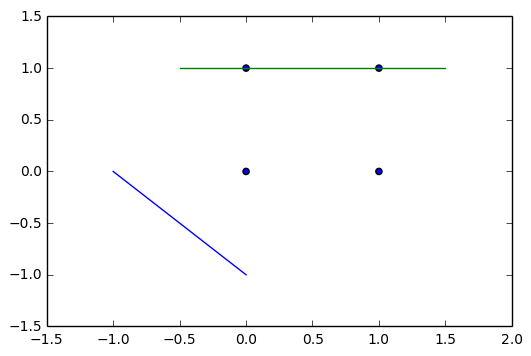

In [229]:
linx1 = np.linspace(-.5,1.5,100)
linx2 = np.linspace(-.5,1.5,100)
plot_Y2 = [
    transfer(np.array([linx1[i],linx2[i]]),coef)
    for i in range(0,100)
]
plt.plot(linx1, plot_Y2, 'g')
plt.scatter([0,0,1,1],[0,1,0,1])
plt.plot([-coef[0]/coef[1],0],[0,-coef[0]/coef[2]])